In [ ]:
!pip install plotly

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import os
import sys
from PIL import Image
import tensorflow as tf
import time
import csv
from matplotlib.pyplot import cm
from cycler import cycler
import math
from IPython.display import HTML
import plotly.express as px
from scipy.optimize import curve_fit

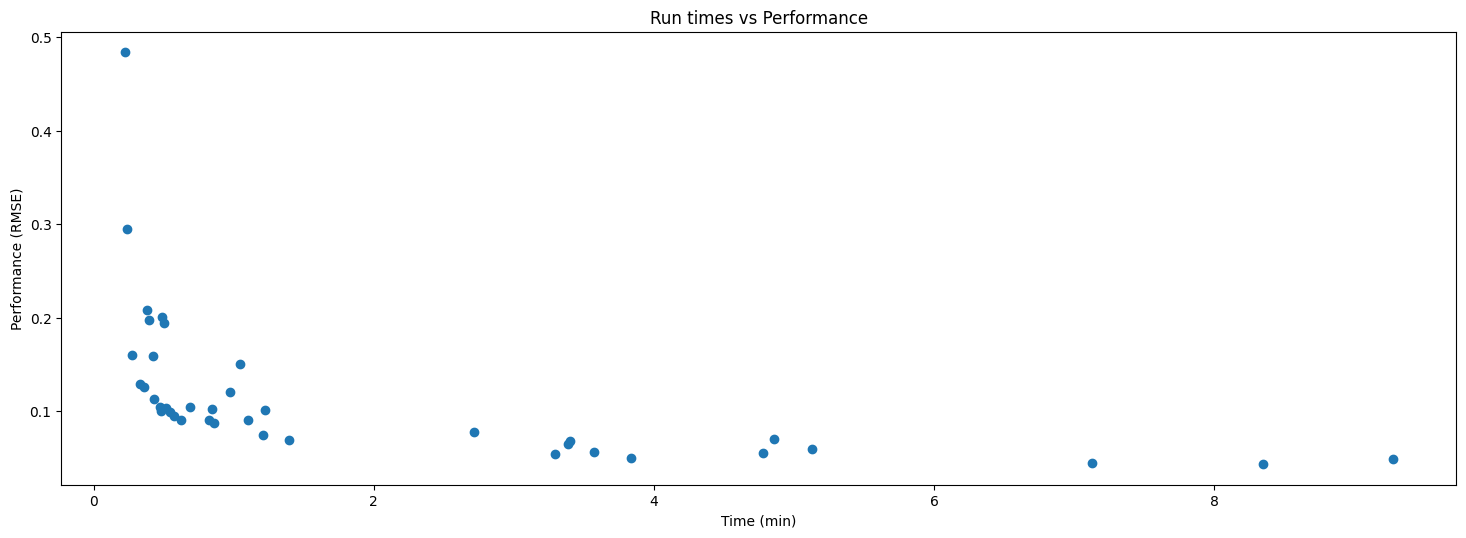

In [ ]:
# For the recreating of the image

models = []
times = []
performances = []

with open(f'/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/recreatingImage_run_20201118-144708.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
      models.append(rows[0])
      times.append(float(rows[1]))
      performances.append(float(rows[2]))
    #D = {rows[0]:float(rows[1]) for rows in reader}

# Remove outlier in this particular example:
del models[-1]
del times[-1]
del performances[-1]

# For larger plot
plt.rcParams['figure.figsize'] = [18, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.figure()

plt.title('Run times vs Performance')
plt.xlabel('Time (min)')
plt.ylabel('Performance (RMSE)')

# Different lines fitted to the data (e.g. power line, log-line)

#z = np.polyfit(times, performances, 1)
#p = np.poly1d(z)
#plt.plot(times,p(times),"r--")

#popt, pcov = curve_fit(lambda fx,a,b: a*fx**-b,  times , performances)
#popt, pcov = curve_fit(lambda fx,a,b: a*np.log(fx*b),  times , performances)
#x_linspace = np.linspace(min(times), max(times), 100)
#power_y = popt[0]*x_linspace**-popt[1]
#log_y = popt[0]*np.log(x_linspace*popt[1])

plt.scatter(times, performances, label='actual data')
#plt.plot(x_linspace, power_y, label='smooth-power-fit')
#plt.plot(x_linspace, log_y, label='smooth-log-fit')
#plt.legend()

plt.show()

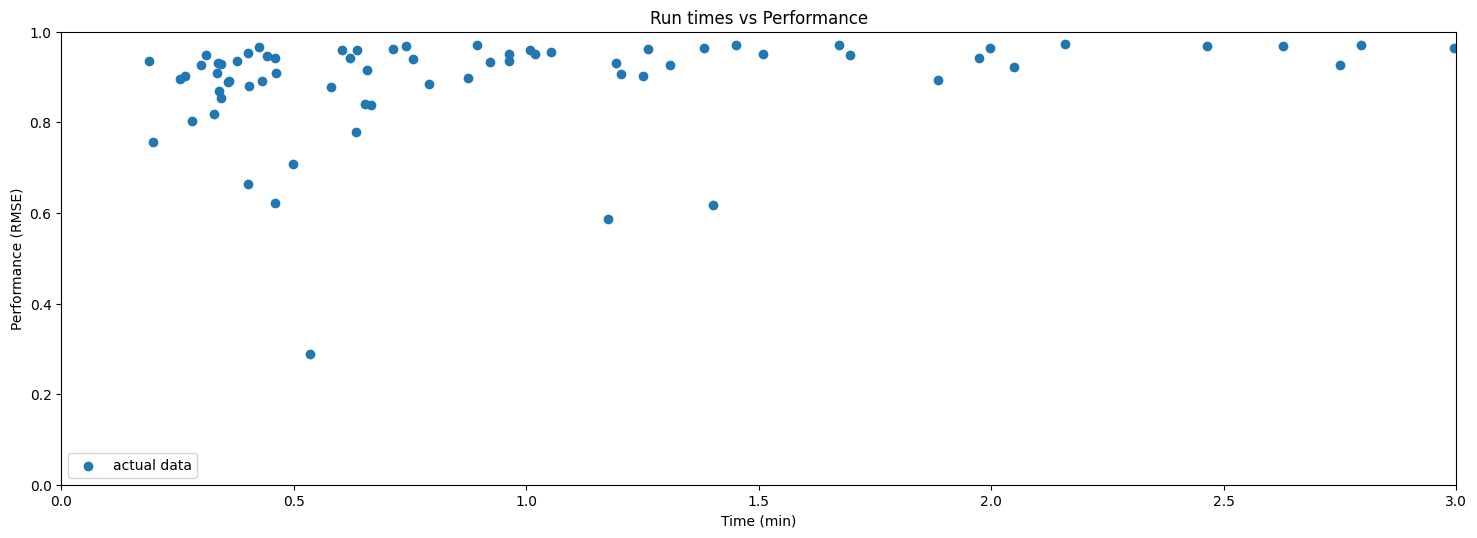

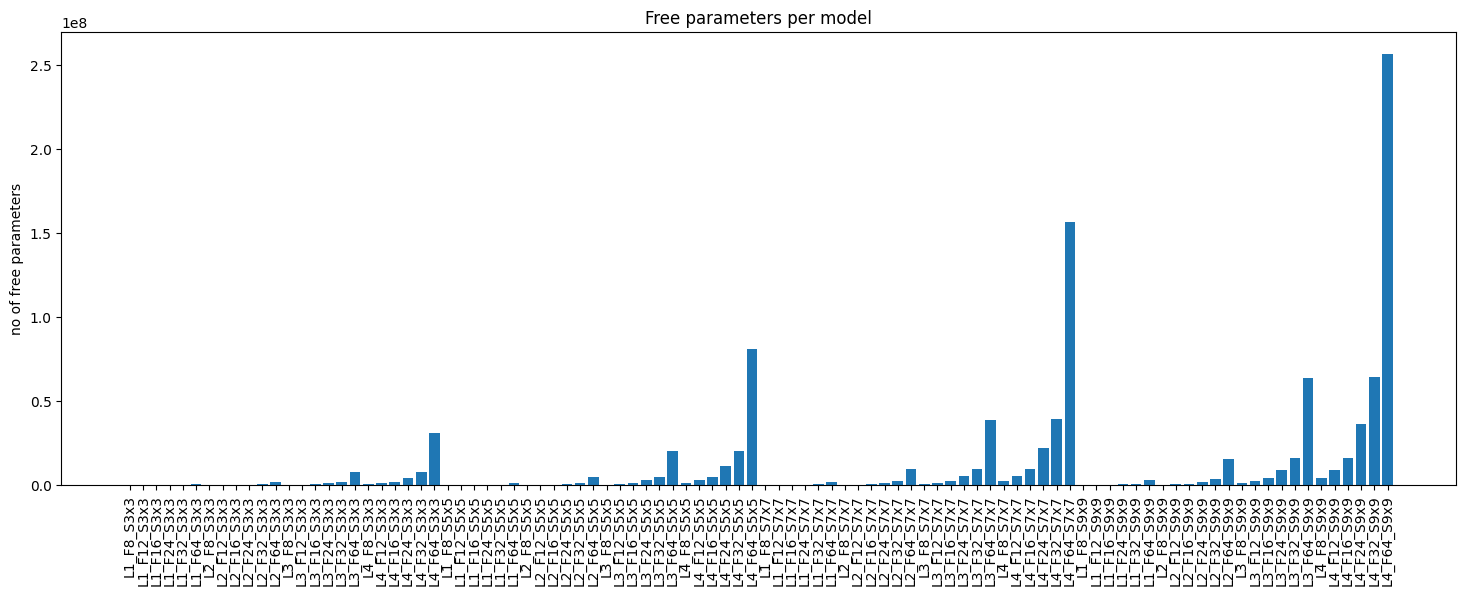

In [ ]:
# For the classification problem

models = []
times = []
performances = []
parameters = []

with open(f'/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/run_results_20201127-110734.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
      models.append(rows[0])
      times.append(float(rows[1]))
      performances.append(float(rows[2]))
      parameters.append(float(rows[3]))
    #D = {rows[0]:float(rows[1]) for rows in reader}

with open(f'/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/run_results_20201127-112307.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
      models.append(rows[0])
      times.append(float(rows[1]))
      performances.append(float(rows[2]))
      parameters.append(float(rows[3]))

with open(f'/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/run_results_20201127-142455.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
      models.append(rows[0])
      times.append(float(rows[1]))
      performances.append(float(rows[2]))
      parameters.append(float(rows[3]))

with open(f'/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/run_results_20201127-133518.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
      models.append(rows[0])
      times.append(float(rows[1]))
      performances.append(float(rows[2]))
      parameters.append(float(rows[3]))

# For larger plot
plt.rcParams['figure.figsize'] = [18, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.figure()

plt.title('Run times vs Performance')
plt.xlabel('Time (min)')
plt.ylabel('Performance (RMSE)')

# Fitting different lines (e.g. power, log) to the data

#z = np.polyfit(times, performances, 1)
#p = np.poly1d(z)
#plt.plot(times,p(times),"r--")

#popt, pcov = curve_fit(lambda fx,a,b: a*fx**-b,  times , performances)
#popt, pcov = curve_fit(lambda fx,a,b: a*np.log(fx*b),  times , performances)
#x_linspace = np.linspace(min(times), max(times), 100)
#power_y = popt[0]*x_linspace**-popt[1]
#log_y = popt[0]*np.log(x_linspace*popt[1])
plt.xlim([0,3])
plt.ylim([0,1])
plt.scatter(times, performances, label='actual data')
#plt.plot(x_linspace, power_y, label='smooth-power-fit')
#plt.plot(x_linspace, log_y, label='smooth-log-fit')
plt.legend()

plt.show()
plt.close()

# For larger plot
plt.rcParams['figure.figsize'] = [18, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

plt.figure()

#plt.ylim([0.95, 1.0])
plt.bar(models,parameters)
plt.title('Free parameters per model')
plt.ylabel('no of free parameters')
plt.xticks(rotation='vertical')
plt.show()


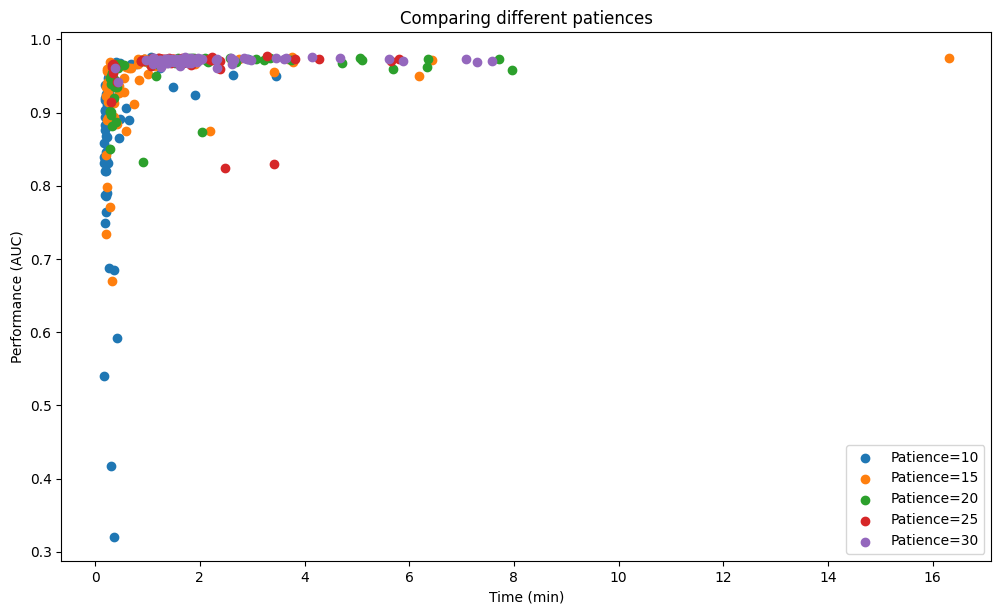

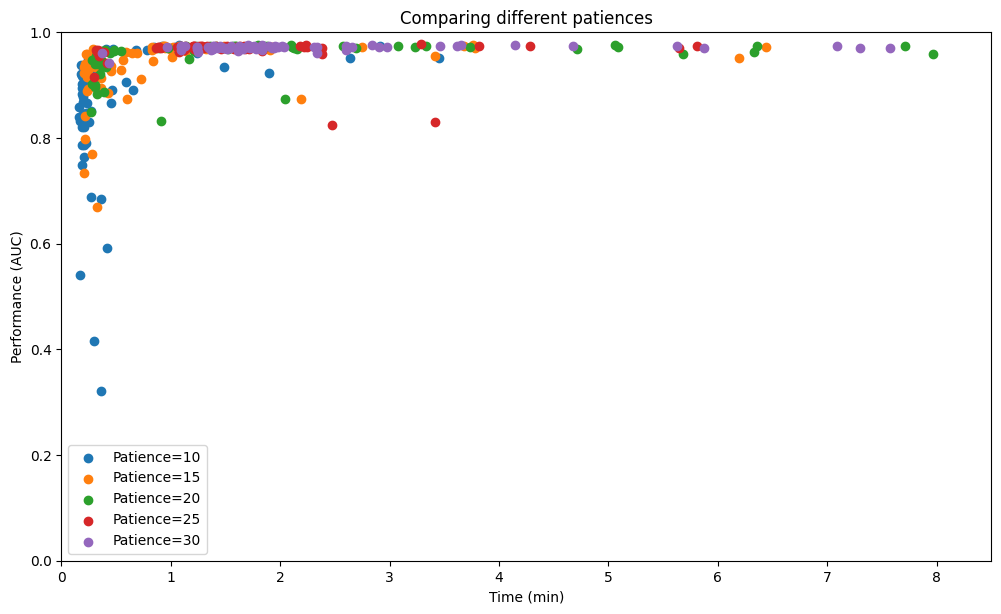

In [ ]:
# Patience test of the early stopping

models = []
times_10 = []
times_15 = []
times_20 = []
times_25 = []
times_30 = []
performances_10 = []
performances_15 = []
performances_20 = []
performances_25 = []
performances_30 = []

patiences = [15, 20, 25, 30]

for i in [1,2,3]:

  with open(f'/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/patience_10_{i}.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
      times_10.append(float(rows[1]))
      performances_10.append(float(rows[2]))
  
  with open(f'/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/patience_15_{i}.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
      times_15.append(float(rows[1]))
      performances_15.append(float(rows[2]))
  
  with open(f'/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/patience_20_{i}.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
      times_20.append(float(rows[1]))
      performances_20.append(float(rows[2]))
  
  with open(f'/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/patience_25_{i}.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
      times_25.append(float(rows[1]))
      performances_25.append(float(rows[2]))

  with open(f'/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/patience_30_{i}.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
      times_30.append(float(rows[1]))
      performances_30.append(float(rows[2]))



# For larger plot
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 100 
plt.figure()


# Initialize color set
n_lines = 5
colors=cm.rainbow(np.linspace(0,1,n_lines))

# Plot the data
plt.title('Comparing different patiences')
plt.xlabel('Time (min)')
plt.ylabel('Performance (AUC)')

plt.scatter(times_10, performances_10, label='Patience=10')
plt.scatter(times_15, performances_15, label='Patience=15')
plt.scatter(times_20, performances_20, label='Patience=20')
plt.scatter(times_25, performances_25, label='Patience=25')
plt.scatter(times_30, performances_30, label='Patience=30')
plt.legend()

plt.show()

# Zoomed in version
plt.xlim([0,8.5])
plt.ylim([0,1])

plt.title('Comparing different patiences')
plt.xlabel('Time (min)')
plt.ylabel('Performance (AUC)')

plt.scatter(times_10, performances_10, label='Patience=10')
plt.scatter(times_15, performances_15, label='Patience=15')
plt.scatter(times_20, performances_20, label='Patience=20')
plt.scatter(times_25, performances_25, label='Patience=25')
plt.scatter(times_30, performances_30, label='Patience=30')
plt.legend()

plt.show()

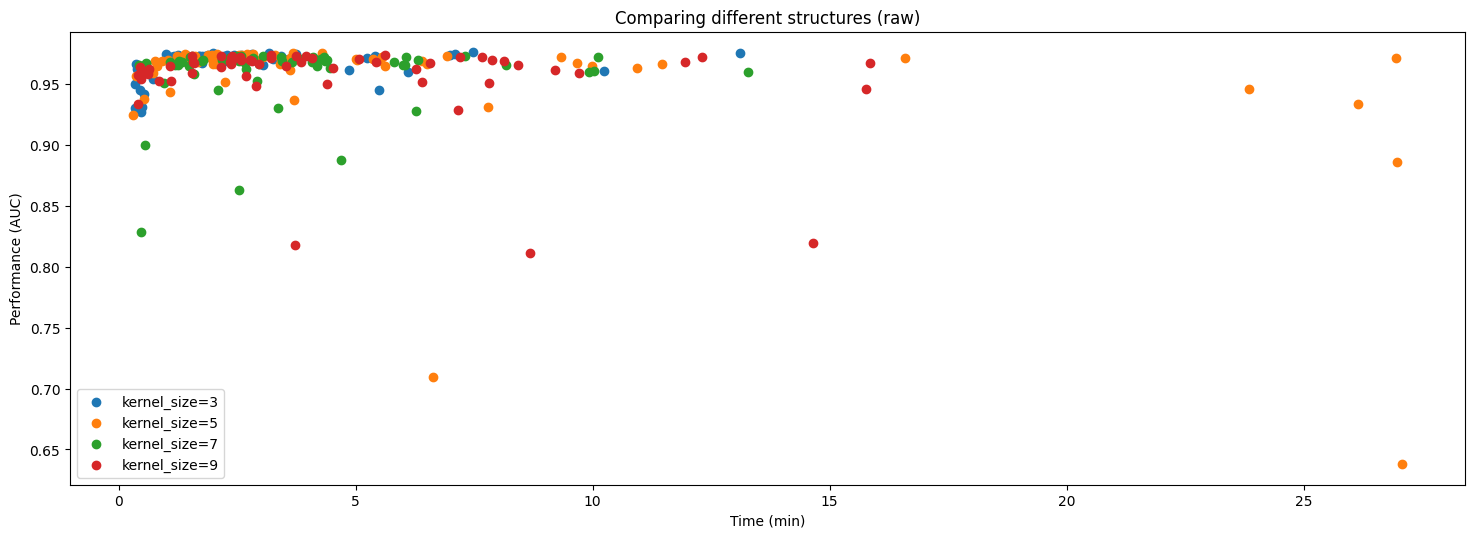

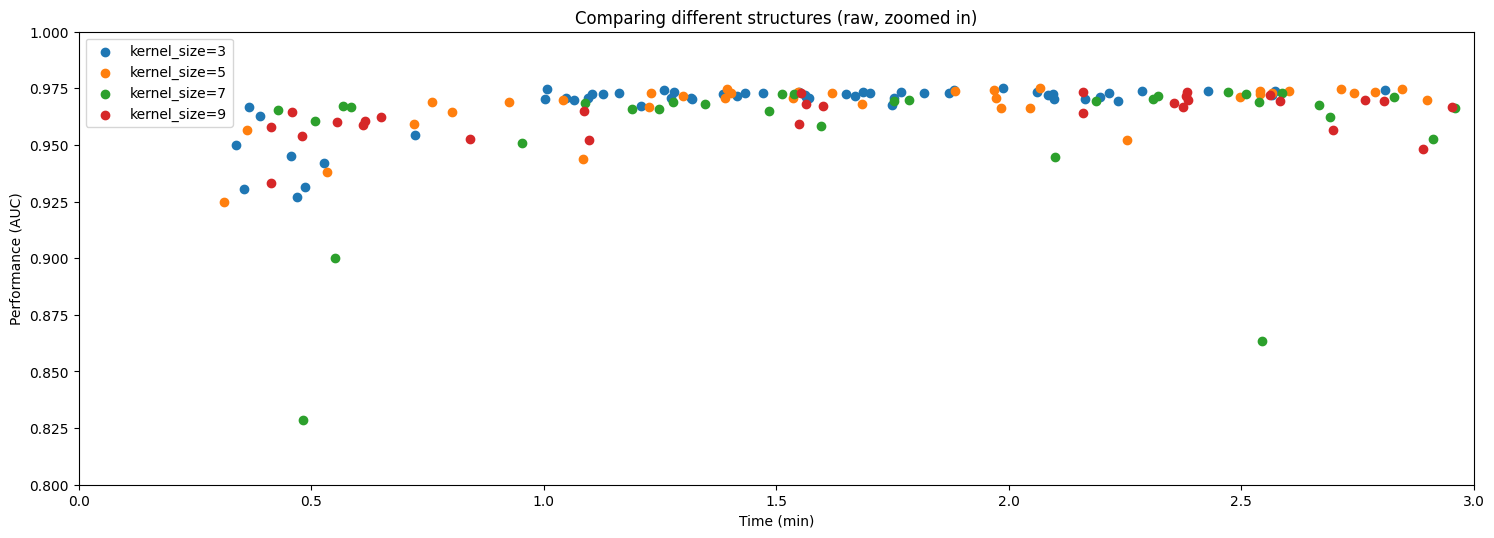

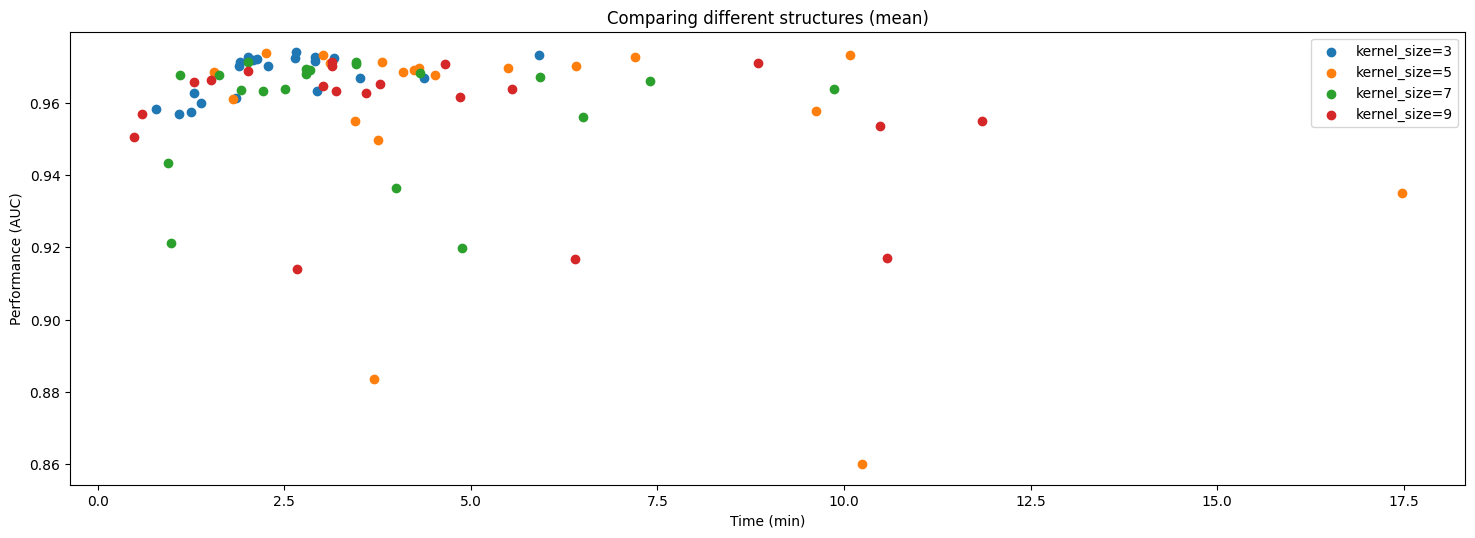

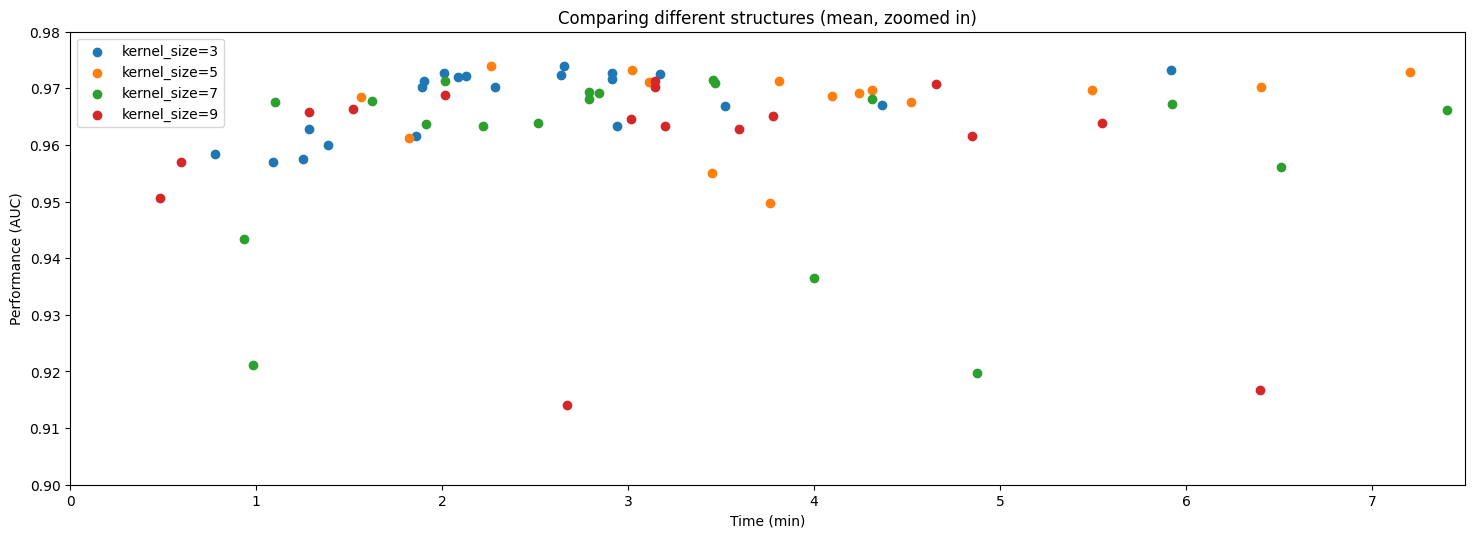

In [ ]:
# Network structure test, without plotly and pandas

models_3 = []
models_5 = []
models_7 = []
models_9 = []

times_3 = []
times_5 = []
times_7 = []
times_9 = []

performances_3 = []
performances_5 = []
performances_7 = []
performances_9 = []



for i in [1,2,3]:

  with open(f'/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/kernel_3x3_{i}.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
      if i == 1:
        models_3.append(rows[0])
      #models.append(rows[0])
      times_3.append(float(rows[1]))
      performances_3.append(float(rows[2]))
  
  with open(f'/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/kernel_5x5_{i}.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
      if i == 1:
        models_5.append(rows[0])
      #models.append(rows[0])
      times_5.append(float(rows[1]))
      performances_5.append(float(rows[2]))
  
  with open(f'/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/kernel_7x7_{i}.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
      if i == 1:
        models_7.append(rows[0])
      #models.append(rows[0])
      times_7.append(float(rows[1]))
      performances_7.append(float(rows[2]))
  
  with open(f'/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/kernel_9x9_{i}.csv', mode='r') as infile:
    reader = csv.reader(infile)
    for rows in reader:
      if i == 1:
        models_9.append(rows[0])
      #models.append(rows[0])
      times_9.append(float(rows[1]))
      performances_9.append(float(rows[2]))

  
# Calculate means
nets = len(models_9)

times_3_mean = []
times_5_mean = []
times_7_mean = []
times_9_mean = []

performances_3_mean = []
performances_5_mean = []
performances_7_mean = []
performances_9_mean = []

for i in range(nets+1):
  times_3_mean.append((times_3[i]+times_3[nets+1+i]+times_3[nets+nets+2+i])/3)
  performances_3_mean.append((performances_3[i]+performances_3[nets+1+i]+performances_3[nets+nets+2+i])/3)


for i in range(nets):
  times_5_mean.append((times_5[i]+times_5[nets+1+i]+times_5[nets+nets+2+i])/3)
  times_7_mean.append((times_7[i]+times_7[nets+i]+times_7[nets+nets+i])/3)
  times_9_mean.append((times_9[i]+times_9[nets+i]+times_9[nets+nets+i])/3)

  performances_5_mean.append((performances_5[i]+performances_5[nets+1+i]+performances_5[nets+nets+2+i])/3)
  performances_7_mean.append((performances_7[i]+performances_7[nets+i]+performances_7[nets+nets+i])/3)
  performances_9_mean.append((performances_9[i]+performances_9[nets+i]+performances_9[nets+nets+i])/3)



# For larger plot
plt.rcParams['figure.figsize'] = [18, 6]
plt.rcParams['figure.dpi'] = 100 

plt.figure()

# Initialize color set
n_lines = 4
colors=cm.rainbow(np.linspace(0,1,n_lines))

# Plot figure
plt.title('Comparing different structures (raw)')
plt.xlabel('Time (min)')
plt.ylabel('Performance (AUC)')

plt.scatter(times_3, performances_3, label='kernel_size=3')
plt.scatter(times_5, performances_5, label='kernel_size=5')
plt.scatter(times_7, performances_7, label='kernel_size=7')
plt.scatter(times_9, performances_9, label='kernel_size=9')

plt.legend()

plt.show()

# Plot zoomed in version
plt.xlim([0,3])
plt.ylim([0.8,1])

plt.title('Comparing different structures (raw, zoomed in)')
plt.xlabel('Time (min)')
plt.ylabel('Performance (AUC)')

plt.scatter(times_3, performances_3, label='kernel_size=3')
plt.scatter(times_5, performances_5, label='kernel_size=5')
plt.scatter(times_7, performances_7, label='kernel_size=7')
plt.scatter(times_9, performances_9, label='kernel_size=9')

plt.legend()

plt.show()


# Plot mean values
plt.title('Comparing different structures (mean)')
plt.xlabel('Time (min)')
plt.ylabel('Performance (AUC)')

plt.scatter(times_3_mean, performances_3_mean, label='kernel_size=3')
plt.scatter(times_5_mean, performances_5_mean, label='kernel_size=5')
plt.scatter(times_7_mean, performances_7_mean, label='kernel_size=7')
plt.scatter(times_9_mean, performances_9_mean, label='kernel_size=9')

plt.legend()

plt.show()

# Plot zoomed in mean values
plt.xlim([0,7.5])
plt.ylim([0.9,0.98])

plt.title('Comparing different structures (mean, zoomed in)')
plt.xlabel('Time (min)')
plt.ylabel('Performance (AUC)')

plt.scatter(times_3_mean, performances_3_mean, label='kernel_size=3')
plt.scatter(times_5_mean, performances_5_mean, label='kernel_size=5')
plt.scatter(times_7_mean, performances_7_mean, label='kernel_size=7')
plt.scatter(times_9_mean, performances_9_mean, label='kernel_size=9')

plt.legend()

plt.show()

In [ ]:
# Network structure test, with plotly and pandas

import plotly.graph_objects as go
import pandas as pd

# Load in the csv-datafiles
df_1= pd.read_csv('/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/complete_run_1.csv')
df_2= pd.read_csv('/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/complete_run_2.csv')
df_3= pd.read_csv('/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/complete_run_3.csv')


# Concatenate the 3 techincal replicates into one singular dataset
df_concat = pd.concat((df_1, df_2, df_3))


# Group the results from different runs and calculate the mean
df_mean = df_concat.groupby('Model').mean()

# Plot the data with plotly go
fig = go.Figure(data=go.Scatter(x=df_mean['Time'],
                                y=df_mean['AUC'],
                                mode='markers',
                                marker=dict(
                                    color=df_mean['Parameters'],
                                    colorscale='Jet',
                                    colorbar=dict(title='Parameters'),
                                    showscale=True
                                ),
                                text=df_mean.index)) 

fig.update_layout(title='Mean performance of different models, segmentation task',
                  xaxis=dict(title="Training time (minutes)"),
                  yaxis=dict(title="Performance (AUC)"))
# Save and show figure
fig.write_html('/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/segmentation_scatter_alternate.html')
fig.show()


# Plot alternative figure using plotly express
fig = px.scatter(df_mean, x="Time", y="AUC", hover_name=df_mean.index, hover_data=["Time", "AUC", "Parameters"])
fig.update_layout(title='Mean performance of different models, segmentation task',
                  xaxis=dict(title="Training time (minutes)"),
                  yaxis=dict(title="Performance (AUC)"))
# Save and show figure
fig.write_html('/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/segmentation_scatter.html')
fig.show()

In [ ]:
# Network structure test (recreating the input), with plotly and pandas
import plotly.graph_objects as go
import pandas as pd

# Load in the csv-datafiles
df_1= pd.read_csv('/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/rec_1.csv')
df_2= pd.read_csv('/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/rec_2.csv')
df_3= pd.read_csv('/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/rec_3.csv')

# Concatenate the 3 techincal replicates into one singular dataset
df_concat = pd.concat((df_1, df_2, df_3))

# Group the results from different runs and calculate the mean
df_mean = df_concat.groupby('Model').mean()

# Plot figure with plotly express
fig = px.scatter(df_mean, x="Time", y="RMSE", hover_name=df_mean.index, hover_data=["Time", "RMSE", "Parameters"])
fig.update_layout(title='Mean performance of different models, recreating the image',
                  xaxis=dict(title="Training time (minutes)"),
                  yaxis=dict(title="Performance (RMSE)"))
fig['layout']['yaxis']['autorange'] = "reversed"

# Save and show figure
fig.write_html('/content/drive/My Drive/Skola/Tillämpad Bioinformatik (slutkursen)/Unet-output/recreating_image_scatter.html')
fig.show()